In [1]:
import json
from pprint import pprint 
# Open the data file 
file = open("cs1064_worked_examples_data.json")
data = json.load(file)

## Break down of number of students that attempted and completed the problems

In [2]:
import numpy as np
import matplotlib.pyplot as plt
labels = "Attempted", "Completed", "Not Attempted"
# Get a data structure to hold data for all questions 
def getDataHolder(): 
    return {
      '#43.4) Multiple Returns':{
          'attempted': 0,
          'completed': 0,
          'not_attempted': 0},
     '#40.2) Word Frequency': {
          'attempted': 0,
          'completed': 0,
          'not_attempted': 0},
     '#39.4) Default Name':{
          'attempted': 0,
          'completed': 0,
          'not_attempted': 0},
     '#33.3) Cube Elements': {
          'attempted': 0,
          'completed': 0,
          'not_attempted': 0}}

problemNames = ["#33.3) Cube Elements", '#39.4) Default Name', '#40.2) Word Frequency', '#43.4) Multiple Returns']
f17Data = getDataHolder()
s18Data = getDataHolder()
# Separate data by section 
f17Students = []
s18BartStudents = []

for student in data:
    assignments = student["assignment"]
    if student["user"]["section"] == "Fall 2017":
        f17Students.append(student)
        problemData = f17Data
    elif student["user"]["section"] == "Bart - MWF":
        s18BartStudents.append(student)
        problemData = s18Data
    else:
        continue
    for problem in problemNames:
        assign = assignments[problem]
        if assign["correct"]:
            problemData[problem]["completed"] = problemData[problem]["completed"]+ 1
        elif assign["attempted"]:
            problemData[problem]["attempted"] = problemData[problem]["attempted"] + 1
        else:
            problemData[problem]["not_attempted"] = problemData[problem]["not_attempted"] + 1
            
labels = "attempted", "completed", "not_attempted"

In [24]:
def autolabel(rects):
    # Attach some text labels.
    for rect in rects:
        ax.text(rect.get_x() + rect.get_width() / 2.,
                rect.get_y() + rect.get_height() / 2.,
                '%f'%rect.get_height(),
                ha = 'center',
                va = 'center')
def buildChart(dataSets, labels, title):
    # Generate figure for cube elements 
    fig = plt.figure()
    # Generate list of percentages for completed, attempted, not_attempted
    
    attempted = []
    completed = []
    not_attempted = []
    for set in dataSets:
        total =sum(set.values())
        attempted.append(set["attempted"]/total*100)
        completed.append(set["completed"]/total*100)
        not_attempted.append(set["not_attempted"]/total*100)

    attempted = np.array(attempted)
    completed = np.array(completed)
    not_attempted = np.array(not_attempted)

#     attempted = np.array([f17Data["data"]["attempted"]/f17Sum*100, s18Data["data"]["attempted"]/s18Sum*100])
#     completed = np.array([f17Data["data"]["completed"]/f17Sum*100, s18Data["data"]["completed"]/s18Sum*100])
#     not_attempted = np.array([f17Data["data"]["not_attempted"]/f17Sum*100, s18Data["data"]["not_attempted"]/s18Sum*100])
    indices = [x for x, _ in enumerate(labels)]
    plt.barh(indices, not_attempted, label="Not attempted", left=completed+attempted)
    plt.barh(indices, attempted, label="Attempted", left=completed)
    plt.barh(indices, completed,  label="Completed")

    plt.yticks(indices, labels)
    plt.xlabel("Percent of students")
    plt.legend()
    plt.title(title)


    plt.show()

## Fall 2017 (No WE Available) vs Spring 18 (WEs available):

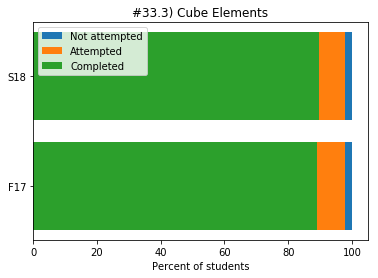

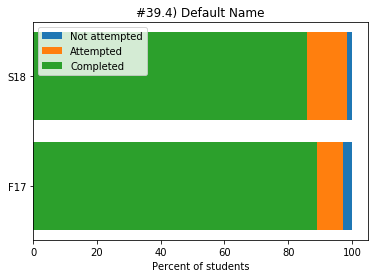

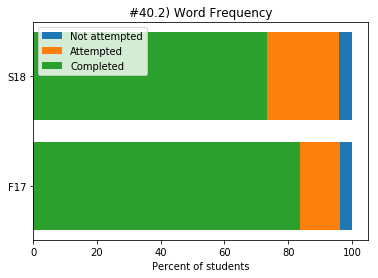

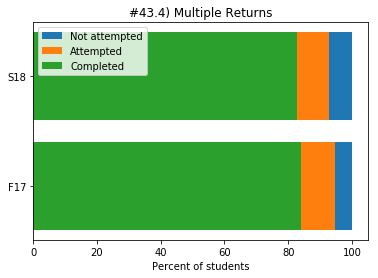

In [4]:
for problem in problemNames:
    buildChart([f17Data[problem], s18Data[problem]], ["F17", "S18"], problem)

## S18 Used WE vs Did Not Use WE

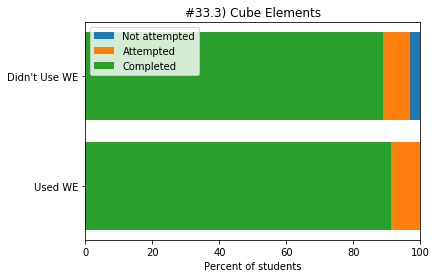

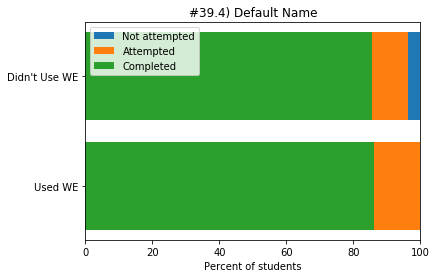

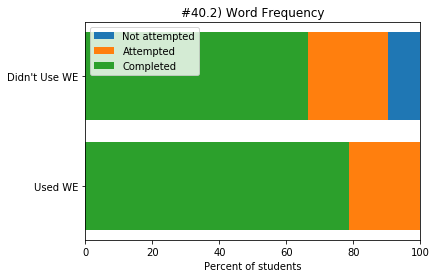

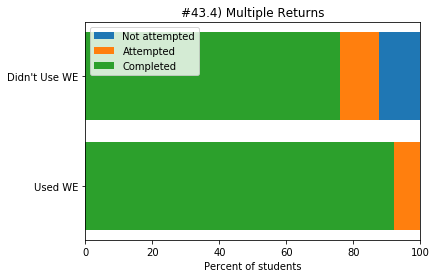

In [5]:
# Analyze S18 completion rates separated by usage of WEs 
# Determines if student used the WE, simple for now, just checks if there is a WE 
# Event in events
def usedWE(events):
    return "worked_examples" in str(events)
WEData = getDataHolder()
noWEData = getDataHolder()

for student in s18BartStudents:
    assignments = student["assignment"]
    for problem in problemNames:
        assign = assignments[problem]
        problemData = WEData[problem] if usedWE(assign) else noWEData[problem]
        if assign["correct"]:
            problemData["completed"] = problemData["completed"]+ 1
        elif assign["attempted"]:
            problemData["attempted"] = problemData["attempted"] + 1
        else:
            problemData["not_attempted"] = problemData["not_attempted"] + 1

for problem in problemNames:
    buildChart([WEData[problem], noWEData[problem]], ["Used WE", "Didn't Use WE"], problem)

## S17 and S18 Prior Programming Experience

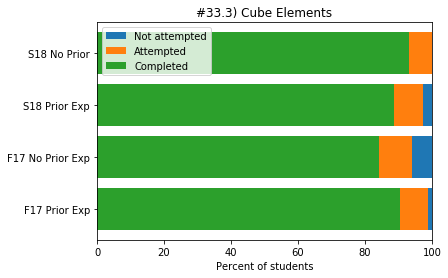

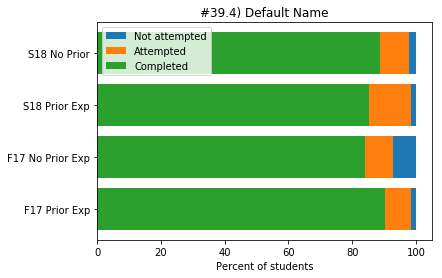

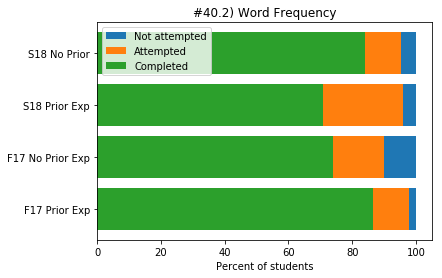

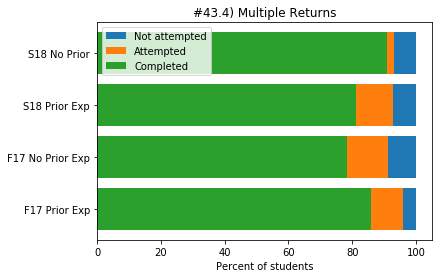

In [25]:
def priorExperience(student):
    return student["demographics"] !=  None and len(student["demographics"].get("Prior Computing Experience", [])) != 0
f17Prior = getDataHolder()
f17NoPrior = getDataHolder()
s18Prior = getDataHolder()
s18NoPrior = getDataHolder()

for student in f17Students:
    assignments = student["assignment"]
    problemData = f17Prior if priorExperience(student) else f17NoPrior
    for problem in problemNames:
        assign = assignments[problem]
        if assign["correct"]:
            problemData[problem]["completed"] = problemData[problem]["completed"]+ 1
        elif assign["attempted"]:
            problemData[problem]["attempted"] = problemData[problem]["attempted"] + 1
        else:
            problemData[problem]["not_attempted"] = problemData[problem]["not_attempted"] + 1

for student in s18BartStudents:
    assignments = student["assignment"]
    problemData = s18Prior if priorExperience(student) else s18NoPrior
    for problem in problemNames:
        assign = assignments[problem]
        if assign["correct"]:
            problemData[problem]["completed"] = problemData[problem]["completed"]+ 1
        elif assign["attempted"]:
            problemData[problem]["attempted"] = problemData[problem]["attempted"] + 1
        else:
            problemData[problem]["not_attempted"] = problemData[problem]["not_attempted"] + 1

for problem in problemNames:
    data = [f17Prior[problem], f17NoPrior[problem], s18Prior[problem], s18NoPrior[problem]]
    labels = ["F17 Prior Exp", "F17 No Prior Exp", "S18 Prior Exp", "S18 No Prior"]
    buildChart(data, labels, problem)
